# COGS 108 - EDA Checkpoint

# Names

- Ant Man
- Hulk
- Iron Man
- Thor
- Wasp

<a id='research_question'></a>
# Research Question

*Fill in your research question here*

# Setup

In [81]:
# Required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import missingno as msno

In [82]:
# Load the datasets
df1 = pd.read_csv('./data/NST-EST2022-ALLDATA.csv')
df2 = pd.read_csv('./data/ACSDP1Y2021.DP04-2023-05-15T012402.csv') 
df3 = pd.read_csv('./data/ACSST1Y2021.S2503-2023-05-15T012555.csv')

In [83]:
# Print the first few rows of the data to get a sense of what's there
df1.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,ESTIMATESBASE2020,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022,NPOPCHG_2020,...,RDEATH2021,RDEATH2022,RNATURALCHG2021,RNATURALCHG2022,RINTERNATIONALMIG2021,RINTERNATIONALMIG2022,RDOMESTICMIG2021,RDOMESTICMIG2022,RNETMIG2021,RNETMIG2022
0,10,0,0,0,United States,331449520,331511512,332031554,333287557,61992,...,10.363828,10.350218,0.434073,0.736729,1.133397,3.038912,0.000000,0.000000,1.133397,3.038912
1,20,1,0,0,Northeast Region,57609156,57448898,57259257,57040406,-160258,...,9.780142,9.868918,0.206629,0.511200,1.402708,3.752662,-4.855348,-8.061896,-3.452640,-4.309234
2,30,1,1,0,New England,15116206,15074473,15121745,15129548,-41733,...,9.530598,9.887115,-0.310502,-0.206669,1.770752,4.655140,1.546021,-3.767839,3.316773,0.887301
3,30,1,2,0,Middle Atlantic,42492950,42374425,42137512,41910858,-118525,...,9.869304,9.862369,0.391400,0.769581,1.271205,3.427836,-7.142565,-9.607444,-5.871360,-6.179608
4,20,2,0,0,Midwest Region,68985537,68961043,68836505,68787595,-24494,...,11.059195,11.169148,-0.207043,-0.125530,0.802714,2.111084,-2.645374,-2.529339,-1.842660,-0.418255


In [84]:
df2.head()

,Label (Grouping),Alabama!!Estimate,Alabama!!Margin of Error,Alabama!!Percent,Alabama!!Percent Margin of Error,Alaska!!Estimate,Alaska!!Margin of Error,Alaska!!Percent,Alaska!!Percent Margin of Error,Arizona!!Estimate,...,Wisconsin!!Percent,Wisconsin!!Percent Margin of Error,Wyoming!!Estimate,Wyoming!!Margin of Error,Wyoming!!Percent,Wyoming!!Percent Margin of Error,Puerto Rico!!Estimate,Puerto Rico!!Margin of Error,Puerto Rico!!Percent,Puerto Rico!!Percent Margin of Error
0,HOUSING OCCUPANCY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Total housing units,"2,313,616",±360,"2,313,616",(X),"327,889",±219,"327,889",(X),"3,138,685",...,"2,748,274",(X),"274,373",±94,"274,373",(X),"1,526,801","±7,559","1,526,801",(X)
2,Occupied housing units,"1,967,559","±10,527",85.0%,±0.5,"271,311","±3,313",82.7%,±1.0,"2,817,723",...,89.1%,±0.3,"242,763","±2,909",88.5%,±1.1,"1,165,982","±9,161",76.4%,±0.5
3,Vacant housing units,"346,057","±10,517",15.0%,±0.5,"56,578","±3,295",17.3%,±1.0,"320,962",...,10.9%,±0.3,"31,610","±2,929",11.5%,±1.1,"360,819","±8,282",23.6%,±0.5
4,Homeowner vacancy rate,1.0,±0.2,(X),(X),0.7,±0.3,(X),(X),0.8,...,(X),(X),0.7,±0.4,(X),(X),1.8,±0.2,(X),(X)


In [85]:
df3.head()

,Label (Grouping),Alabama!!Occupied housing units!!Estimate,Alabama!!Occupied housing units!!Margin of Error,Alabama!!Percent occupied housing units!!Estimate,Alabama!!Percent occupied housing units!!Margin of Error,Alabama!!Owner-occupied housing units!!Estimate,Alabama!!Owner-occupied housing units!!Margin of Error,Alabama!!Percent owner-occupied housing units!!Estimate,Alabama!!Percent owner-occupied housing units!!Margin of Error,Alabama!!Renter-occupied housing units!!Estimate,...,Puerto Rico!!Percent occupied housing units!!Estimate,Puerto Rico!!Percent occupied housing units!!Margin of Error,Puerto Rico!!Owner-occupied housing units!!Estimate,Puerto Rico!!Owner-occupied housing units!!Margin of Error,Puerto Rico!!Percent owner-occupied housing units!!Estimate,Puerto Rico!!Percent owner-occupied housing units!!Margin of Error,Puerto Rico!!Renter-occupied housing units!!Estimate,Puerto Rico!!Renter-occupied housing units!!Margin of Error,Puerto Rico!!Percent renter-occupied housing units!!Estimate,Puerto Rico!!Percent renter-occupied housing units!!Margin of Error
0,Occupied housing units,"1,967,559","±10,527","1,967,559","±10,527","1,377,932","±12,342","1,377,932","±12,342","589,627",...,"1,165,982","±9,161","800,555","±10,264","800,555","±10,264","365,427","±8,509","365,427","±8,509"
1,HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Less than $5,000","86,032","±5,034",4.4%,±0.3,"41,022","±3,614",3.0%,±0.3,"45,010",...,13.5%,±0.5,"63,406","±4,119",7.9%,±0.5,"94,313","±4,253",25.8%,±1.3
3,"$5,000 to $9,999","66,418","±4,636",3.4%,±0.2,"25,268","±2,659",1.8%,±0.2,"41,150",...,11.0%,±0.4,"76,353","±4,316",9.5%,±0.5,"52,427","±3,848",14.3%,±1.0
4,"$10,000 to $14,999","109,733","±5,769",5.6%,±0.3,"53,388","±4,041",3.9%,±0.3,"56,345",...,11.3%,±0.6,"85,752","±5,334",10.7%,±0.7,"46,465","±3,895",12.7%,±1.0


In [86]:
# Print a summary of the dataframes
print(df1.info())
print(df2.info())
print(df3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SUMLEV                 66 non-null     int64  
 1   REGION                 66 non-null     object 
 2   DIVISION               66 non-null     object 
 3   STATE                  66 non-null     int64  
 4   NAME                   66 non-null     object 
 5   ESTIMATESBASE2020      66 non-null     int64  
 6   POPESTIMATE2020        66 non-null     int64  
 7   POPESTIMATE2021        66 non-null     int64  
 8   POPESTIMATE2022        66 non-null     int64  
 9   NPOPCHG_2020           66 non-null     int64  
 10  NPOPCHG_2021           66 non-null     int64  
 11  NPOPCHG_2022           66 non-null     int64  
 12  BIRTHS2020             66 non-null     int64  
 13  BIRTHS2021             66 non-null     int64  
 14  BIRTHS2022             66 non-null     int64  
 15  DEATHS20

In [87]:
print(df3.columns)

Index(['Label (Grouping)', 'Alabama!!Occupied housing units!!Estimate',
       'Alabama!!Occupied housing units!!Margin of Error',
       'Alabama!!Percent occupied housing units!!Estimate',
       'Alabama!!Percent occupied housing units!!Margin of Error',
       'Alabama!!Owner-occupied housing units!!Estimate',
       'Alabama!!Owner-occupied housing units!!Margin of Error',
       'Alabama!!Percent owner-occupied housing units!!Estimate',
       'Alabama!!Percent owner-occupied housing units!!Margin of Error',
       'Alabama!!Renter-occupied housing units!!Estimate',
       ...
       'Puerto Rico!!Percent occupied housing units!!Estimate',
       'Puerto Rico!!Percent occupied housing units!!Margin of Error',
       'Puerto Rico!!Owner-occupied housing units!!Estimate',
       'Puerto Rico!!Owner-occupied housing units!!Margin of Error',
       'Puerto Rico!!Percent owner-occupied housing units!!Estimate',
       'Puerto Rico!!Percent owner-occupied housing units!!Margin of Error

# Data Cleaning

Describe your data cleaning steps here.

## 1. Check missing values

Missing values in dataset 1:


<Axes: >

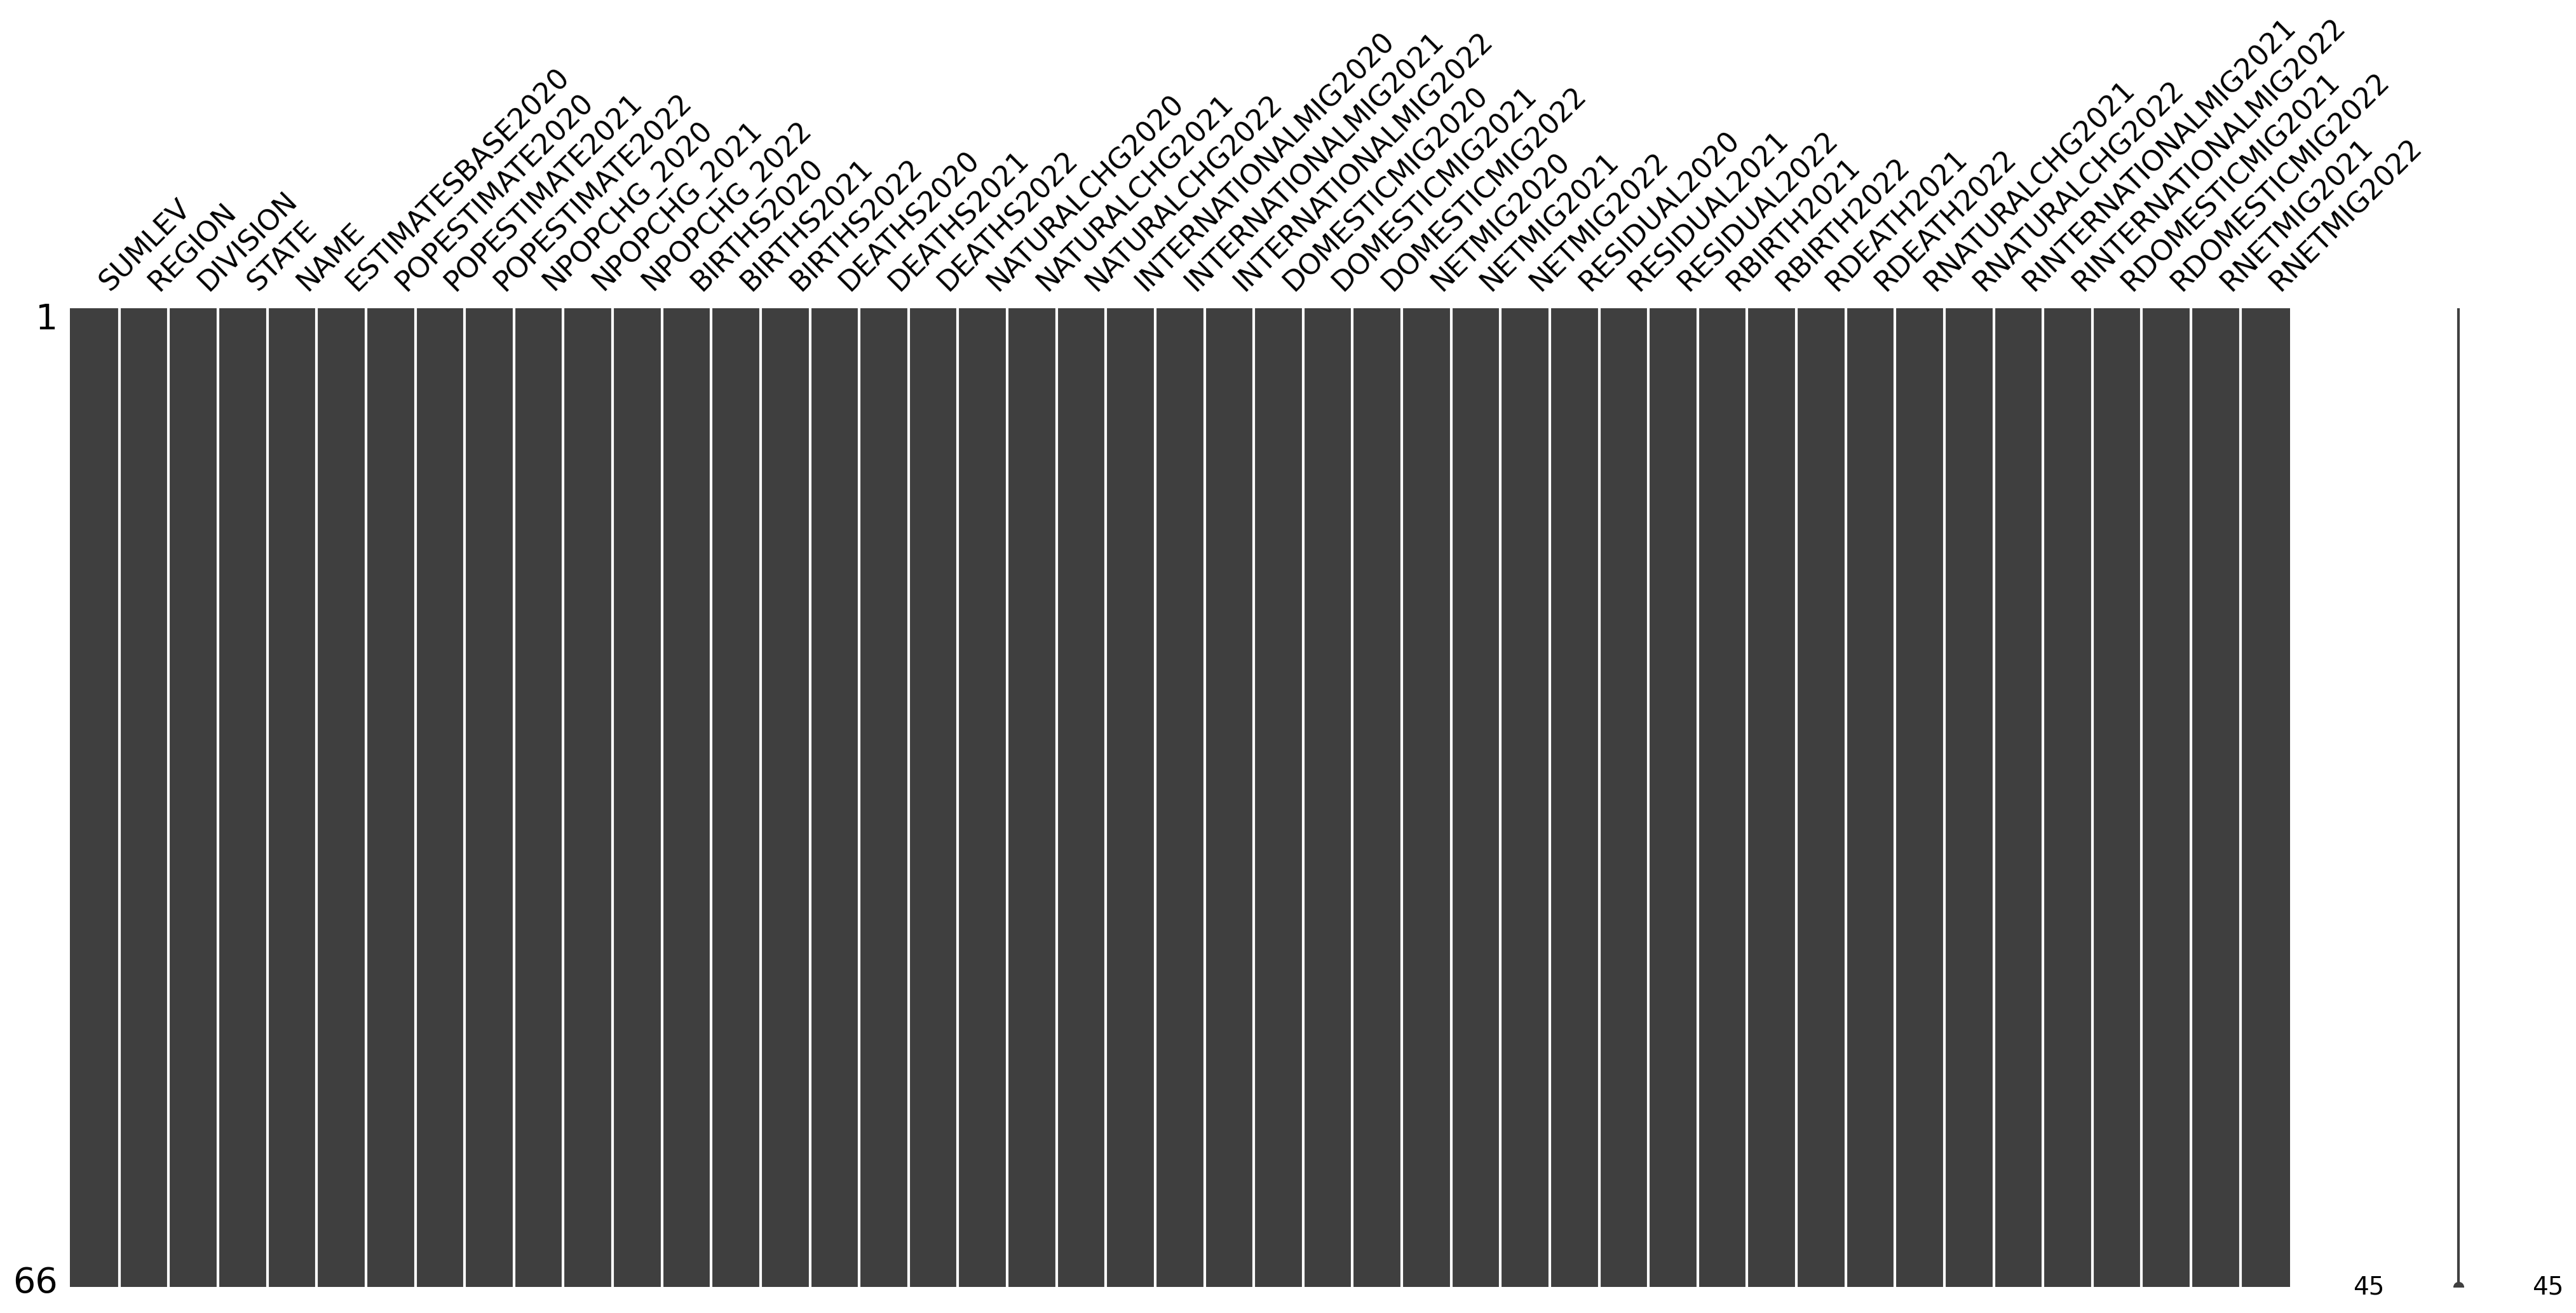

In [88]:
print("Missing values in dataset 1:")
msno.matrix(df1)

Missing values in dataset 2:


<Axes: >

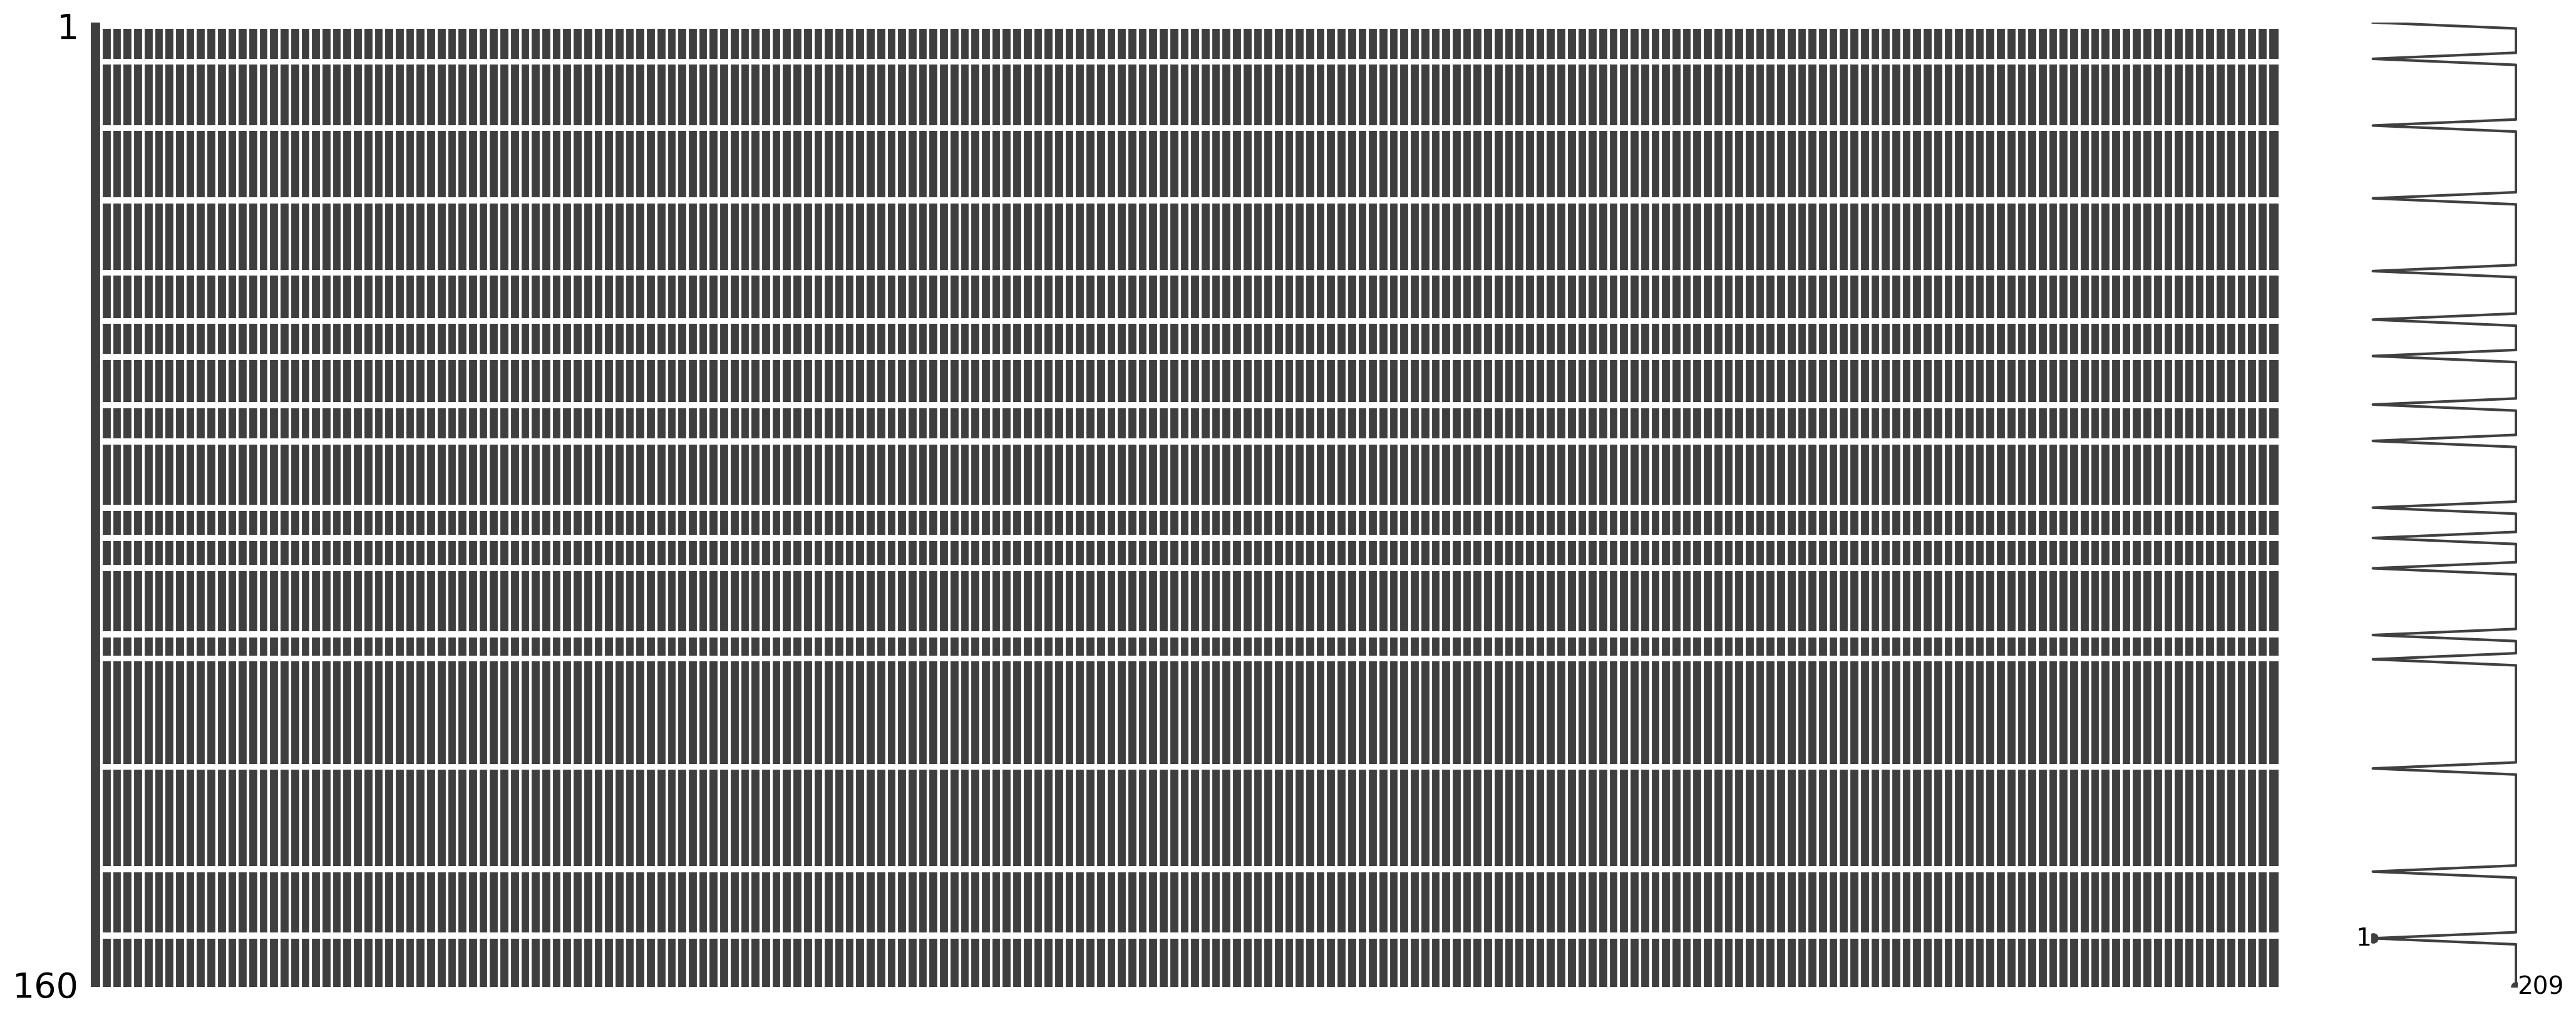

In [89]:
print("Missing values in dataset 2:")
msno.matrix(df2)

Missing values in dataset 3:


<Axes: >

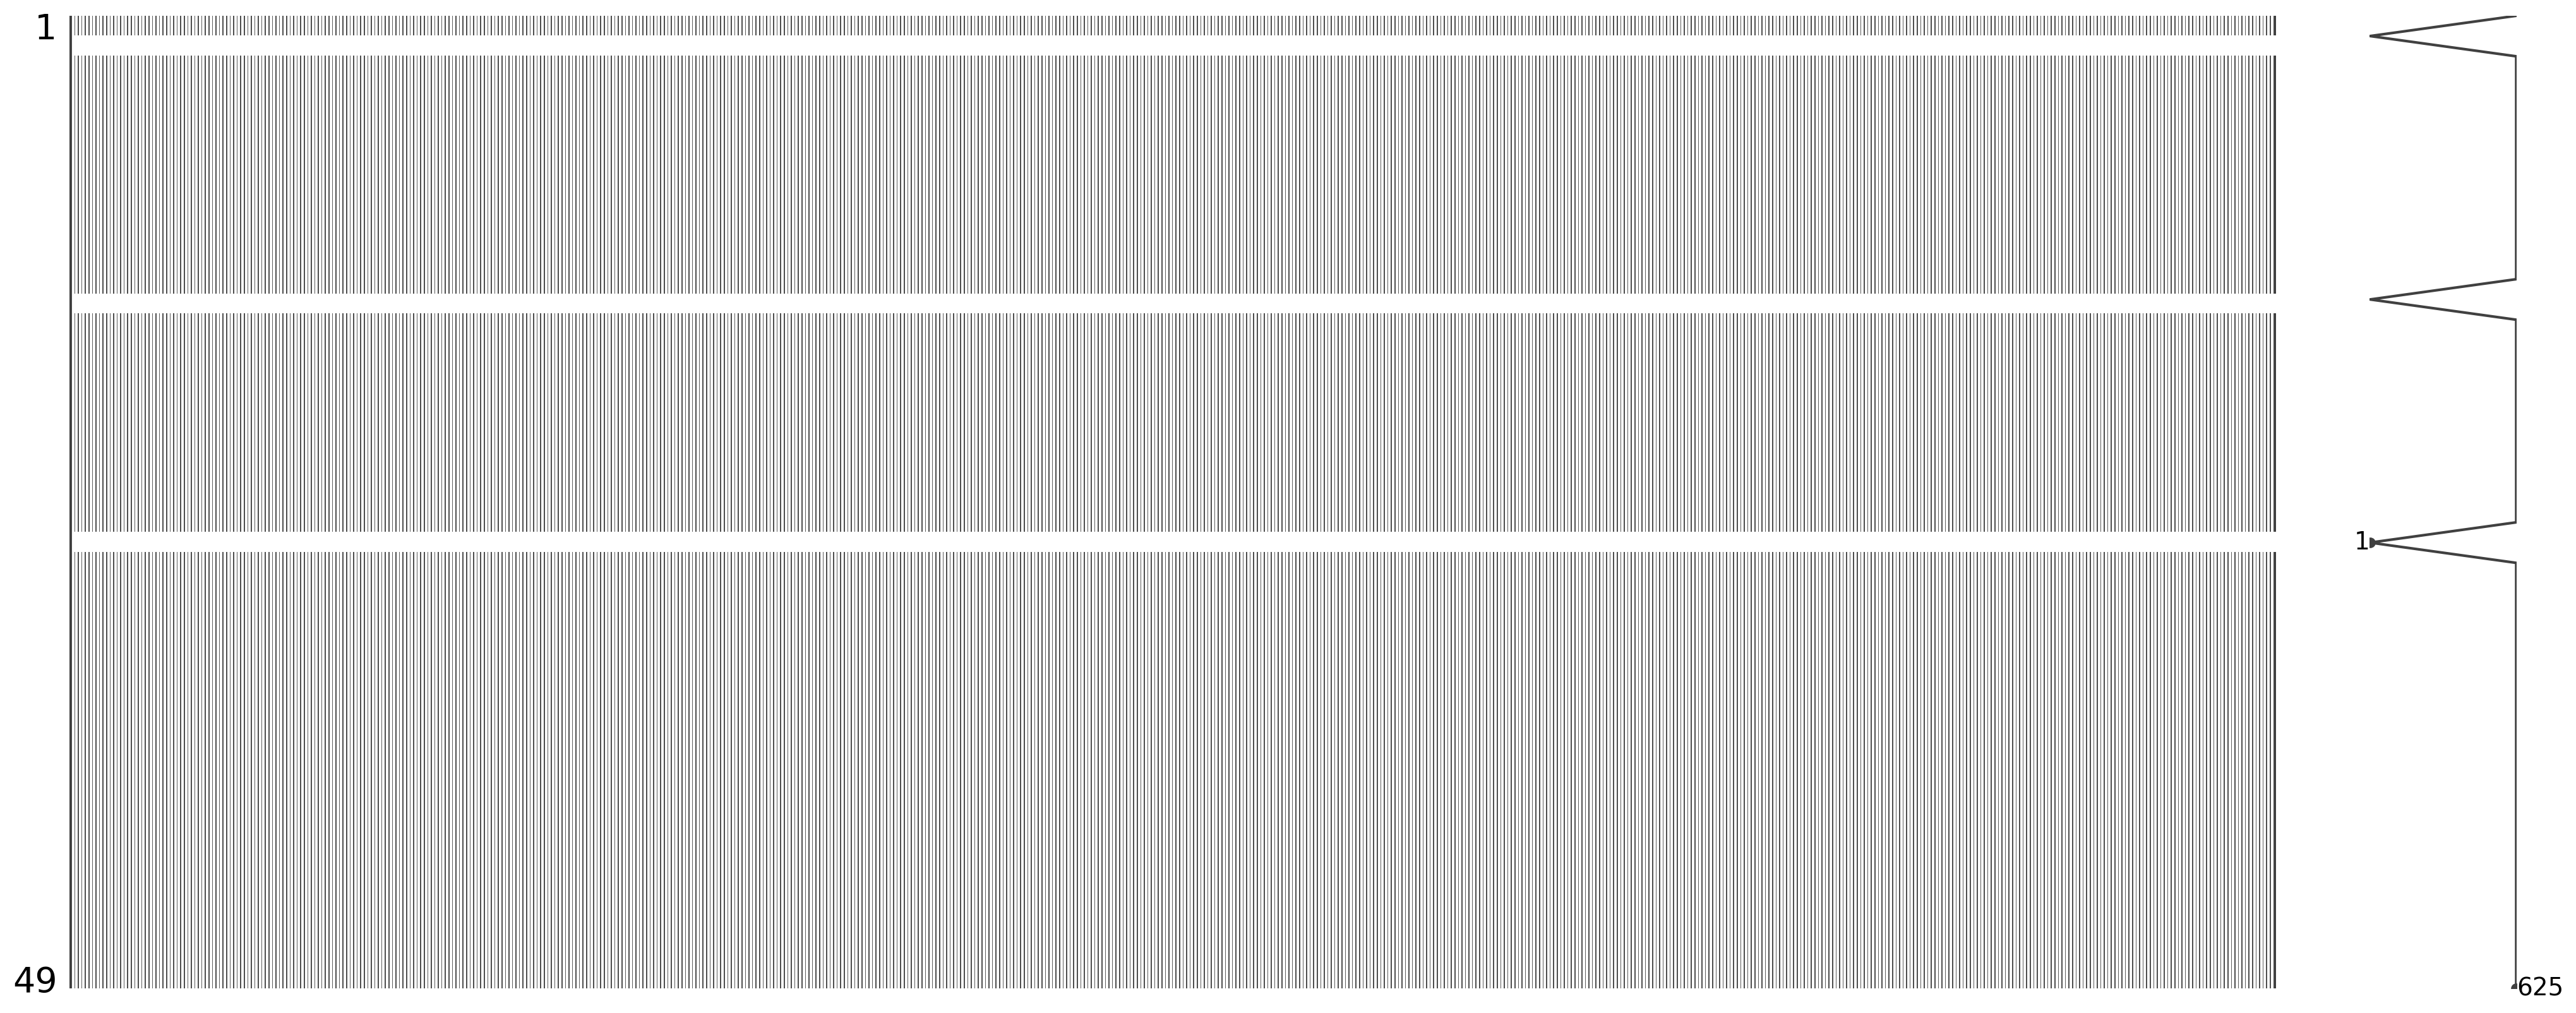

In [90]:
print("Missing values in dataset 3:")
msno.matrix(df3)

In [91]:
# Remove rows with missing data
df1 = df1.dropna()
df2 = df2.dropna()

Text(0.5, 1.0, 'Top 10 States by Population')

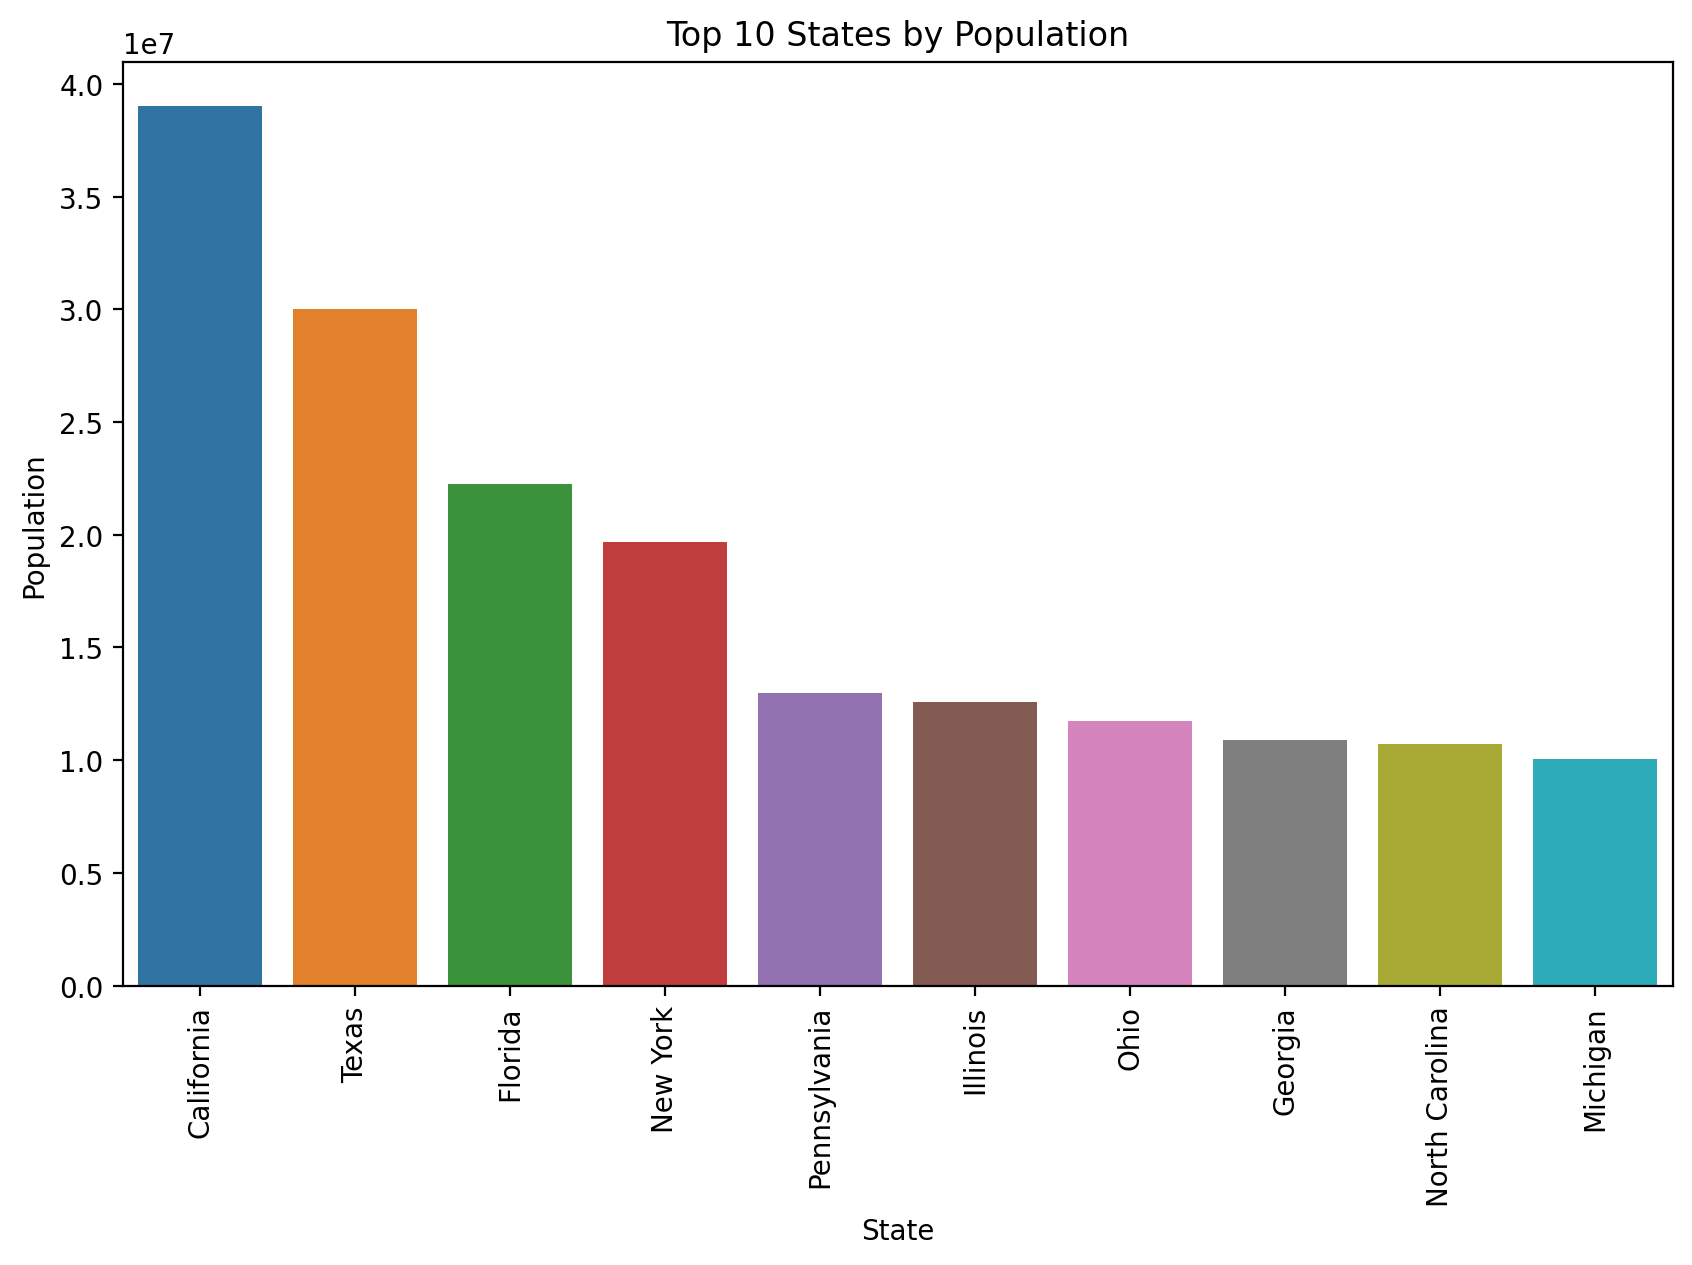

In [92]:
# Population by state

# Except regions, United States, Northeast Region, New England, Middle Atlantic, Midwest Region, East North Central, West North Central, South Region, South Atlantic, East South Central, West South Central, West Region, Mountain, Pacific
df1 = df1[~df1['NAME'].isin(['United States', 'Northeast Region', 'New England', 'Middle Atlantic', 'Midwest Region', 'East North Central', 'West North Central', 'South Region', 'South Atlantic', 'East South Central', 'West South Central', 'West Region', 'Mountain', 'Pacific'])]

plt.figure(figsize=(10,6))
sns.barplot(x='NAME', y='POPESTIMATE2022', data=df1.sort_values(by='POPESTIMATE2022', ascending=False).head(10))
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Population')
plt.title('Top 10 States by Population')

In [93]:
# Housing costs by state based on df3,  MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS"
# Extract the relevant columns from df3
df = df3.loc[df3['Label (Grouping)'] == 'MONTHLY HOUSING COSTS']
df

# List the data in each using key value pairs, keys is everything in df
for key, value in df.items():
    print(key, value)

# Rename the columns to make them easier to work with
# df.columns = [col.split('!!')[0] for col in df.columns]

# # Melt the DataFrame to create a long format
# df = pd.melt(df, id_vars=['Label (Grouping)'], var_name='State', value_name='Percentage')

# # Remove rows with missing values
# df = df.dropna()

# # Convert the percentage column to numeric
# df['Percentage'] = pd.to_numeric(df['Percentage'].str.replace('%', ''))

# # Create the plot
# plt.figure(figsize=(10,6))
# sns.barplot(x='State', y='Percentage', data=df.sort_values(by='Percentage', ascending=False).head(10))
# plt.xticks(rotation=90)
# plt.xlabel('State')
# plt.ylabel('Monthly Housing Costs as % of Household Income')
# plt.title('Top 10 States by Monthly Housing Costs as % of Household Income')
# plt.show()

Label (Grouping) Series([], Name: Label (Grouping), dtype: object)
Alabama!!Occupied housing units!!Estimate Series([], Name: Alabama!!Occupied housing units!!Estimate, dtype: object)
Alabama!!Occupied housing units!!Margin of Error Series([], Name: Alabama!!Occupied housing units!!Margin of Error, dtype: object)
Alabama!!Percent occupied housing units!!Estimate Series([], Name: Alabama!!Percent occupied housing units!!Estimate, dtype: object)
Alabama!!Percent occupied housing units!!Margin of Error Series([], Name: Alabama!!Percent occupied housing units!!Margin of Error, dtype: object)
Alabama!!Owner-occupied housing units!!Estimate Series([], Name: Alabama!!Owner-occupied housing units!!Estimate, dtype: object)
Alabama!!Owner-occupied housing units!!Margin of Error Series([], Name: Alabama!!Owner-occupied housing units!!Margin of Error, dtype: object)
Alabama!!Percent owner-occupied housing units!!Estimate Series([], Name: Alabama!!Percent owner-occupied housing units!!Estimate, dty

,Label (Grouping),Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,...,Puerto Rico,Puerto Rico,Puerto Rico,Puerto Rico,Puerto Rico,Puerto Rico,Puerto Rico,Puerto Rico,Puerto Rico,Puerto Rico


# Data Analysis & Results (EDA)

Carry out EDA on your dataset(s); Describe in this section

In [94]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION